<a href="https://colab.research.google.com/github/SriSharanya-617/random_forest/blob/main/creditcardrf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [32]:
from google.colab import drive
import pandas as pd
drive.mount(r'/content/drive')
path=r'/content/creditcard.csv'
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [30]:
df=df.dropna()

In [33]:
X = df.drop('Class', axis=1)   # Input features
y = df['Class']               # Target (0 = Legit, 1 = Fraud)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120901 entries, 0 to 120900
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    120901 non-null  int64  
 1   V1      120901 non-null  float64
 2   V2      120901 non-null  float64
 3   V3      120901 non-null  float64
 4   V4      120901 non-null  float64
 5   V5      120901 non-null  float64
 6   V6      120901 non-null  float64
 7   V7      120901 non-null  float64
 8   V8      120901 non-null  float64
 9   V9      120901 non-null  float64
 10  V10     120901 non-null  float64
 11  V11     120901 non-null  float64
 12  V12     120901 non-null  float64
 13  V13     120901 non-null  float64
 14  V14     120901 non-null  float64
 15  V15     120901 non-null  float64
 16  V16     120901 non-null  float64
 17  V17     120901 non-null  float64
 18  V18     120901 non-null  float64
 19  V19     120901 non-null  float64
 20  V20     120901 non-null  float64
 21  V21     12

In [35]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

NameError: name 'x' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

model.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [28]:
#Step 5: Predict on Test Data
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[20967     1]
 [    9    37]]


In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9995241267726278

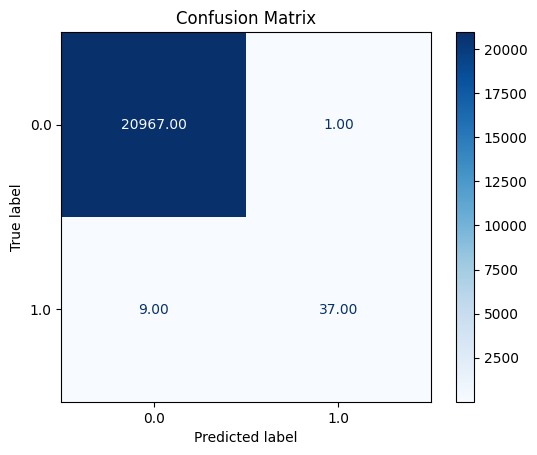

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Blues",values_format=".2f")
plt.title("Confusion Matrix")
plt.show()

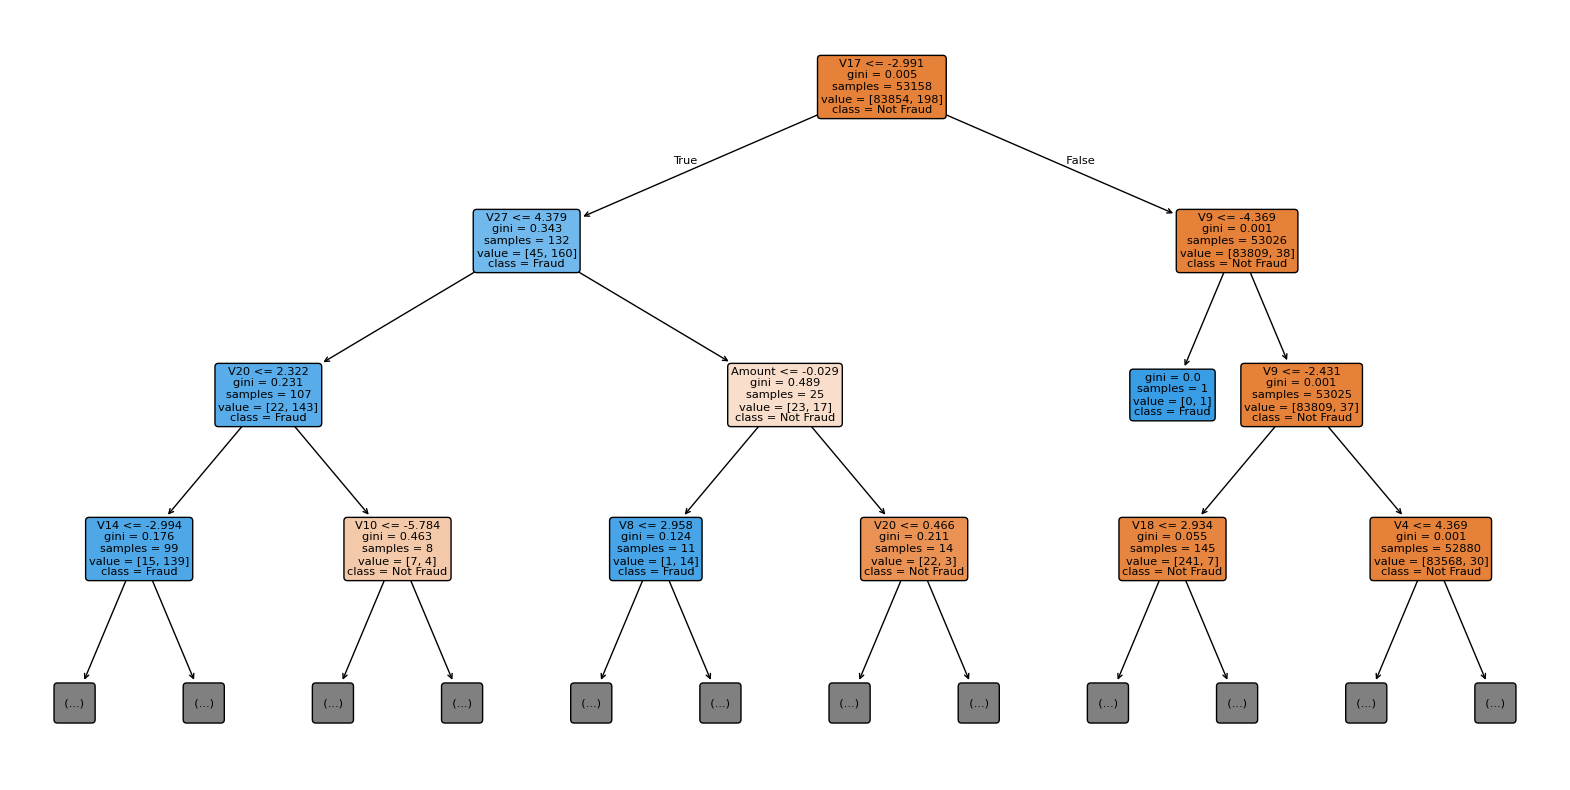

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select ONE tree from the Random Forest
single_tree = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    single_tree,
    feature_names=X.columns,
    class_names=["Not Fraud", "Fraud"],  # change labels if needed
    filled=True,
    rounded=True,
    max_depth=3  # IMPORTANT: limits depth so it fits on screen
)

plt.show()
